# Лабораторная работа № 6

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import seaborn as sns

## Формирование искусственных наборов данных

In [258]:
# с помощью make_blobs
X1, y1 = make_blobs(n_samples=300, centers=3, random_state=42)

# с помощью make_moons
X2, y2 = make_moons(n_samples=300, noise=0.05, random_state=42)

# с помощью make_circles
X3, y3 = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)
print(X3[0][0])
# самостоятельно
np.random.seed(42)
tempX = np.random.rand(300) + np.array(2)
X4 = np.random.rand(300, 2) + np.array([2, 2])
y4 = []
for i in range(len(tempX)):
  if i % 4 == 0:
    X4[i][0] = tempX[i]
    X4[i][1] = tempX[i]**2
    y4.append(0)
  if i % 4 == 1:
    X4[i][0] = tempX[i]
    X4[i][1] = tempX[i]*4 + 1
    y4.append(1)
  if i % 4 == 2:
    X4[i][0] = tempX[i]
    X4[i][1] = 1/tempX[i]
    y4.append(2)
  if i % 4 == 3:
    X4[i][0] = tempX[i]
    X4[i][1] = tempX[i]
    y4.append(3)

-0.18136136036252404


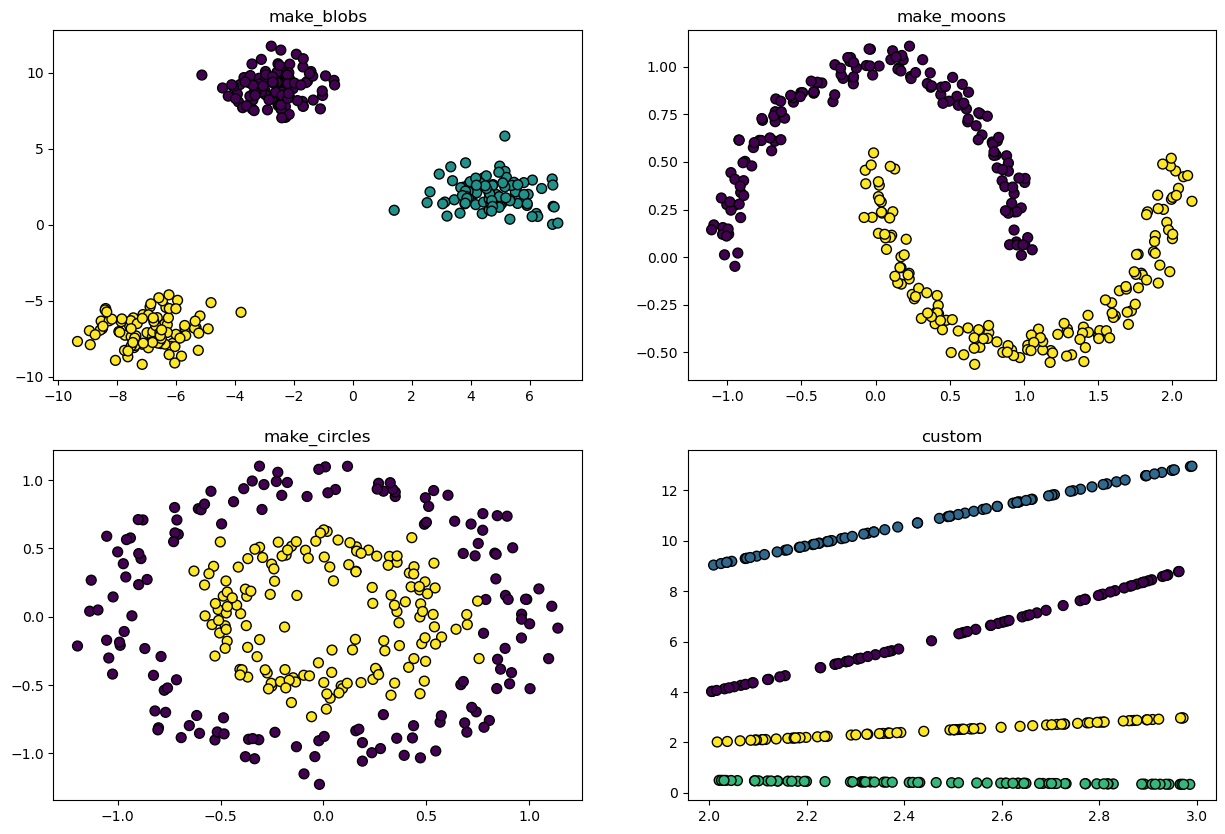

In [259]:
datasets = [(X1, y1, "make_blobs"), (X2, y2, "make_moons"), (X3, y3, "make_circles"), (X4, y4, "custom")]

plt.figure(figsize=(15, 10))
for i, (X, y, title) in enumerate(datasets, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
    plt.title(title)

## Сравнительный анализ алгоритмов кластеризации

### k-means с различными гиперпараметрами

/Users/tainazitina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tainazitina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tainazitina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tainazitina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

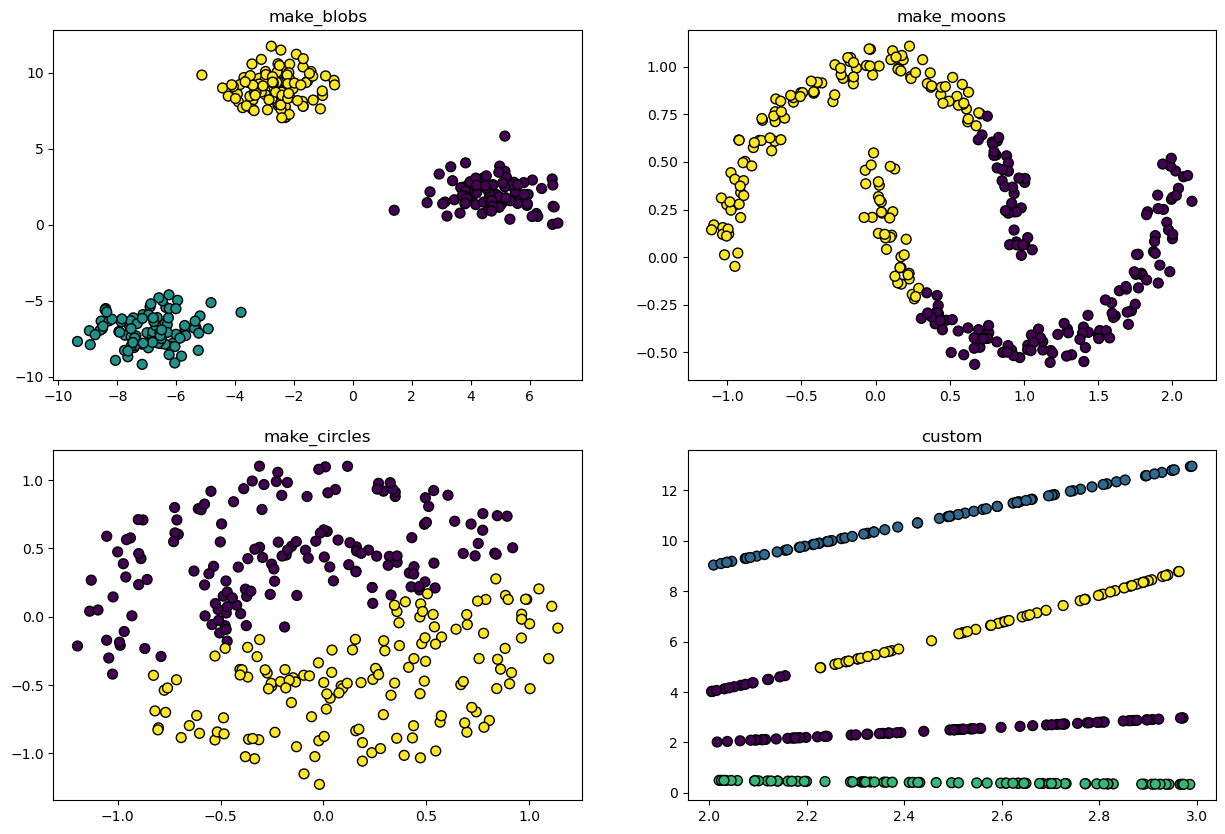

In [260]:
make_blobs_kmeans_1 = KMeans(n_clusters=3)
make_moons_kmeans_1 = KMeans(n_clusters=2)
make_circles_kmeans_1 = KMeans(n_clusters=2)
custom_kmeans_1 = KMeans(n_clusters=4)

result_1 = [(X1, make_blobs_kmeans_1.fit_predict(X1), "make_blobs"), 
            (X2, make_moons_kmeans_1.fit_predict(X2), "make_moons"), 
            (X3, make_circles_kmeans_1.fit_predict(X3), "make_circles"), 
            (X4, custom_kmeans_1.fit_predict(X4), "custom")]

plt.figure(figsize=(15, 10))
for i, (X, y, title) in enumerate(result_1, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
    plt.title(title)

/Users/tainazitina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tainazitina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tainazitina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tainazitina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

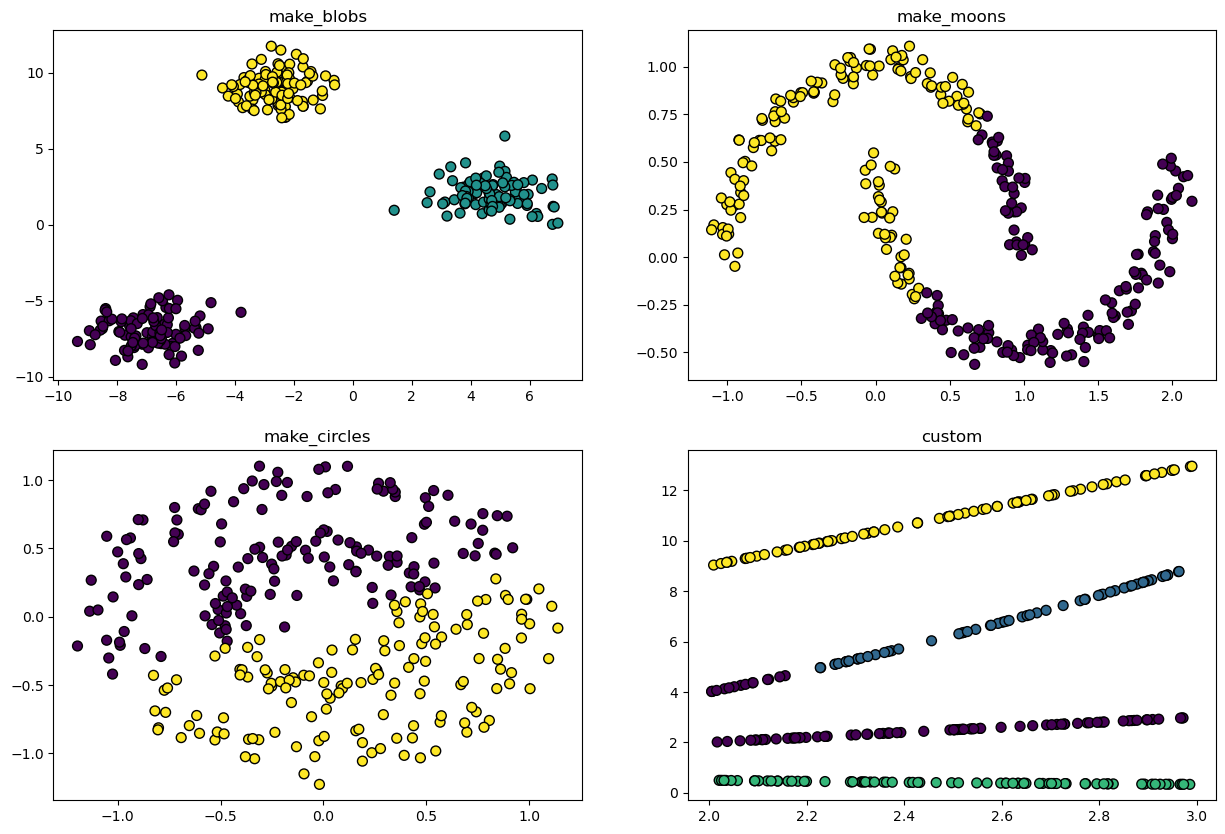

In [261]:
make_blobs_kmeans_2 = KMeans(n_clusters=3, init='random')
make_moons_kmeans_2 = KMeans(n_clusters=2, init='random')
make_circles_kmeans_2 = KMeans(n_clusters=2, init='random')
custom_kmeans_2 = KMeans(n_clusters=4, init='random')

result_2 = [(X1, make_blobs_kmeans_2.fit_predict(X1), "make_blobs"), 
            (X2, make_moons_kmeans_2.fit_predict(X2), "make_moons"), 
            (X3, make_circles_kmeans_2.fit_predict(X3), "make_circles"), 
            (X4, custom_kmeans_2.fit_predict(X4), "custom")]

plt.figure(figsize=(15, 10))
for i, (X, y, title) in enumerate(result_2, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
    plt.title(title)

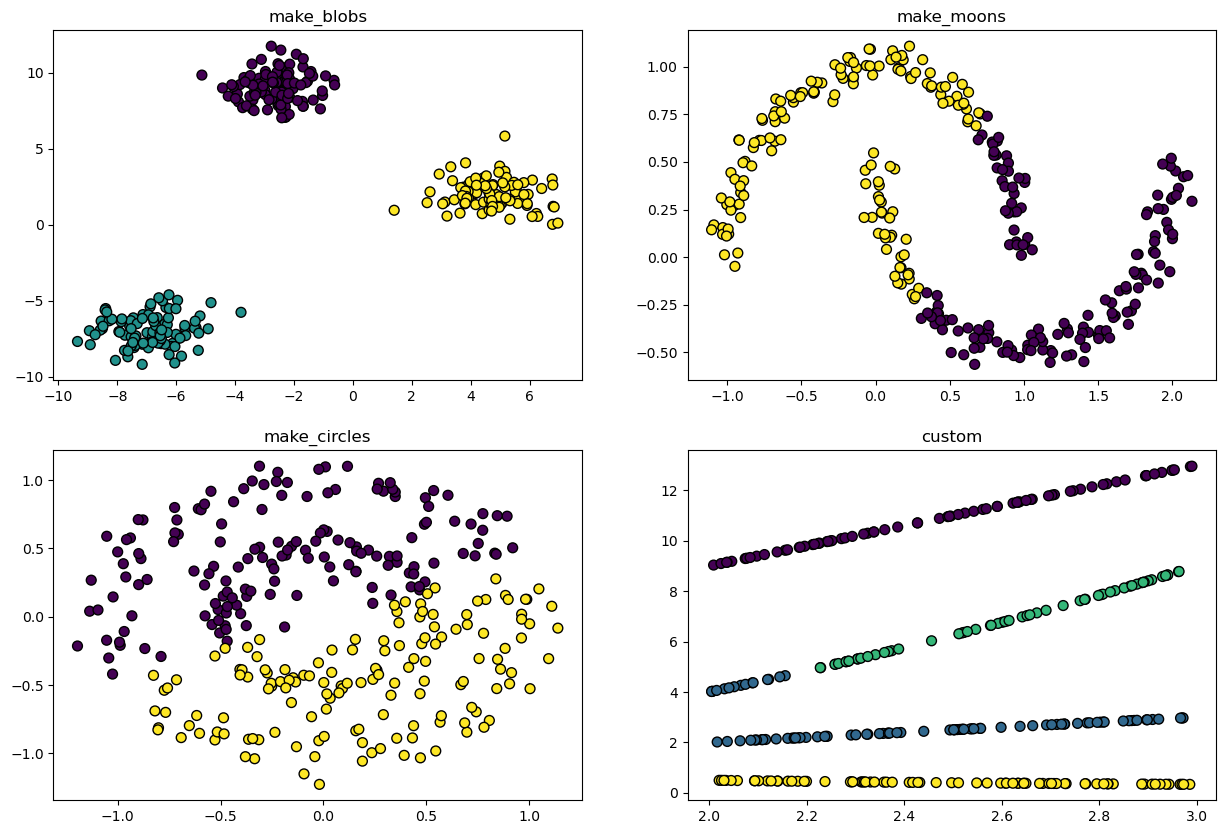

In [262]:
make_blobs_kmeans_3 = KMeans(n_clusters=3, n_init=100)
make_moons_kmeans_3 = KMeans(n_clusters=2, n_init=100)
make_circles_kmeans_3 = KMeans(n_clusters=2, n_init=100)
custom_kmeans_3 = KMeans(n_clusters=4, n_init=100)

result_3 = [(X1, make_blobs_kmeans_3.fit_predict(X1), "make_blobs"), 
            (X2, make_moons_kmeans_3.fit_predict(X2), "make_moons"), 
            (X3, make_circles_kmeans_3.fit_predict(X3), "make_circles"), 
            (X4, custom_kmeans_3.fit_predict(X4), "custom")]

plt.figure(figsize=(15, 10))
for i, (X, y, title) in enumerate(result_3, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
    plt.title(title)

/Users/tainazitina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tainazitina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tainazitina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tainazitina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

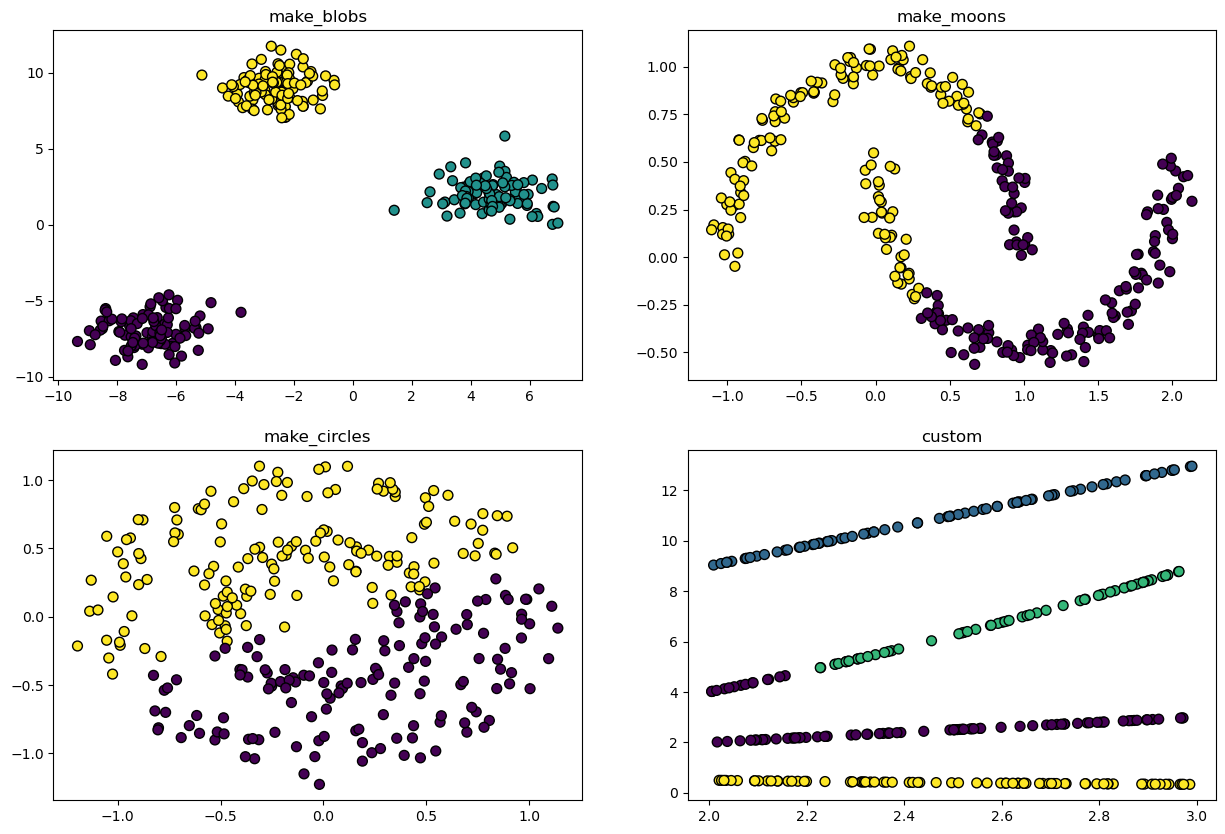

In [263]:
make_blobs_kmeans_4 = KMeans(n_clusters=3, max_iter=1000)
make_moons_kmeans_4 = KMeans(n_clusters=2, max_iter=1000)
make_circles_kmeans_4 = KMeans(n_clusters=2, max_iter=1000)
custom_kmeans_4 = KMeans(n_clusters=4, max_iter=1000)

result_4 = [(X1, make_blobs_kmeans_4.fit_predict(X1), "make_blobs"), 
            (X2, make_moons_kmeans_4.fit_predict(X2), "make_moons"), 
            (X3, make_circles_kmeans_4.fit_predict(X3), "make_circles"), 
            (X4, custom_kmeans_4.fit_predict(X4), "custom")]

plt.figure(figsize=(15, 10))
for i, (X, y, title) in enumerate(result_4, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
    plt.title(title)

### agglomerative clustering с различными гиперпараметрами

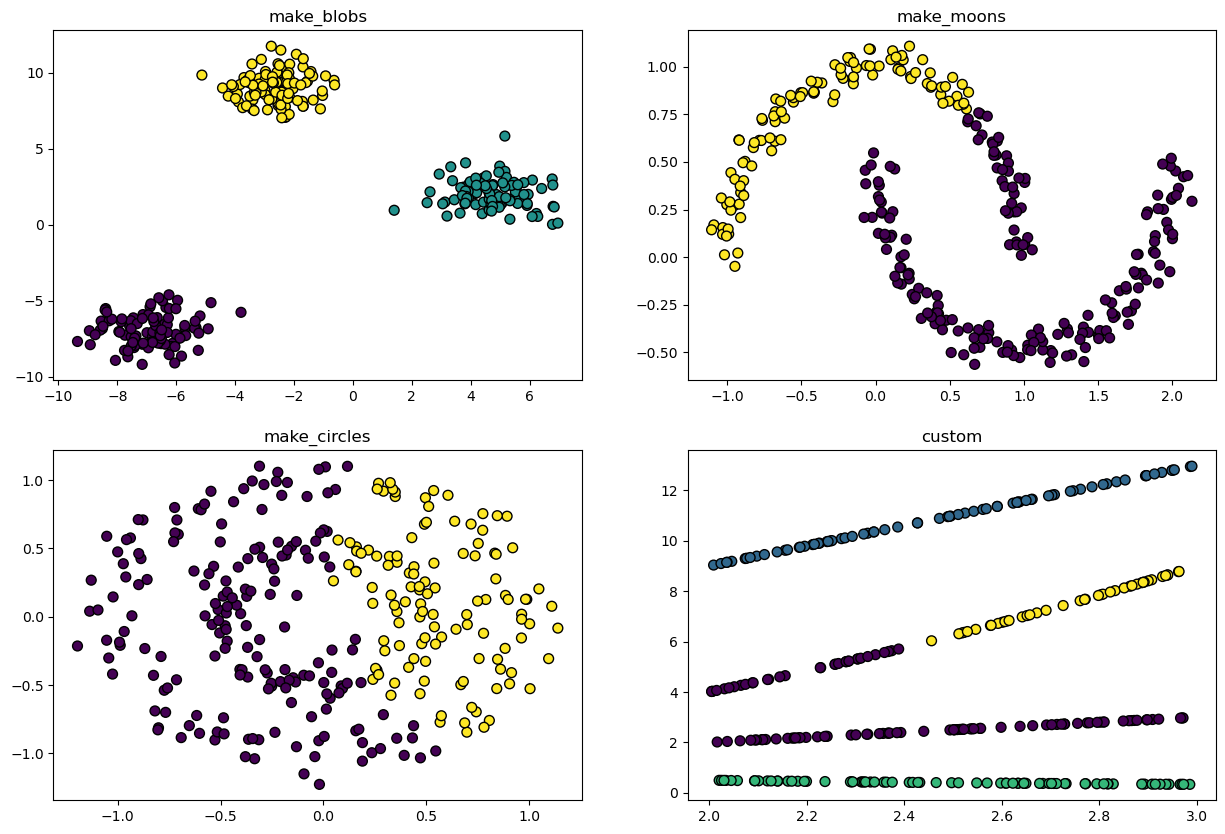

In [264]:
make_blobs_aggclu_1 = AgglomerativeClustering(n_clusters=3)
make_moons_aggclu_1 = AgglomerativeClustering(n_clusters=2)
make_circles_aggclu_1 = AgglomerativeClustering(n_clusters=2)
custom_aggclu_1 = AgglomerativeClustering(n_clusters=4)

result_11 = [(X1, make_blobs_aggclu_1.fit_predict(X1), "make_blobs"), 
            (X2, make_moons_aggclu_1.fit_predict(X2), "make_moons"), 
            (X3, make_circles_aggclu_1.fit_predict(X3), "make_circles"), 
            (X4, custom_aggclu_1.fit_predict(X4), "custom")]

plt.figure(figsize=(15, 10))
for i, (X, y, title) in enumerate(result_11, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
    plt.title(title)

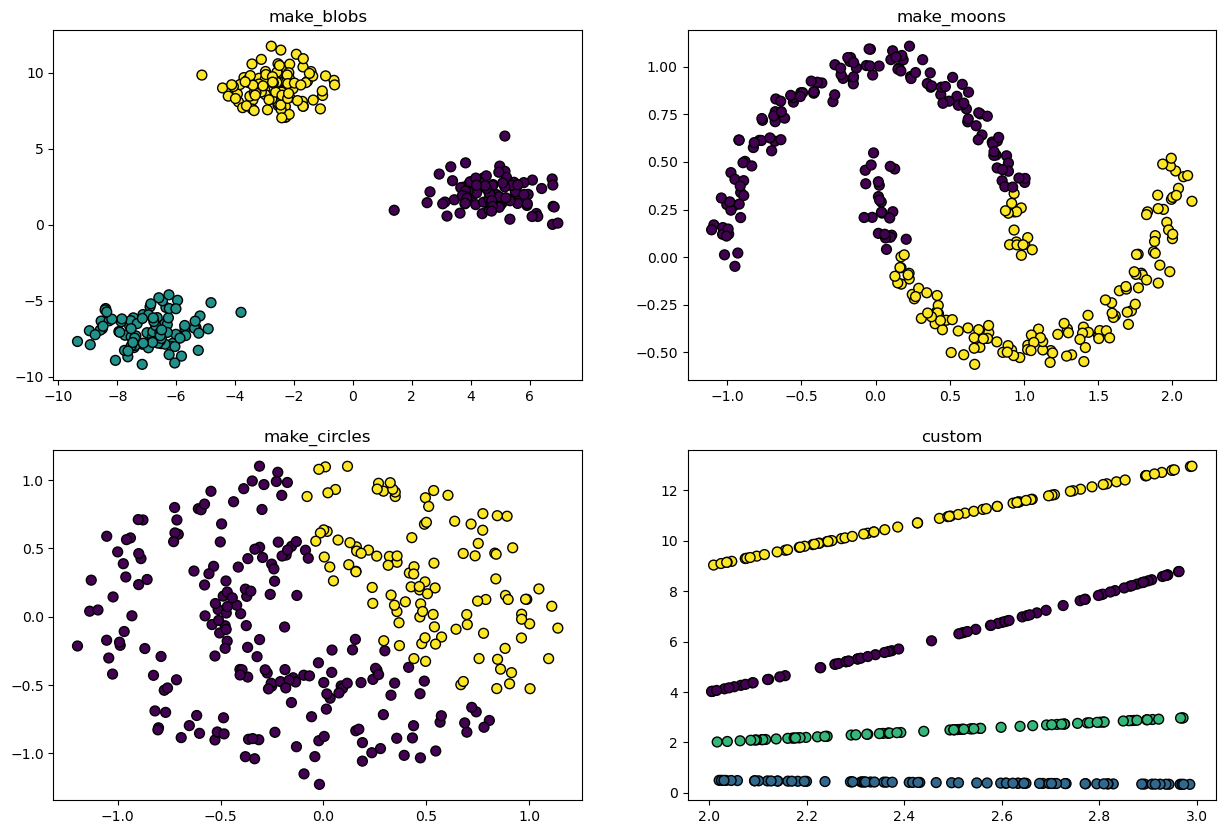

In [265]:
make_blobs_aggclu_2 = AgglomerativeClustering(n_clusters=3, linkage='average', metric='cosine')
make_moons_aggclu_2 = AgglomerativeClustering(n_clusters=2, linkage='average', metric='cosine')
make_circles_aggclu_2 = AgglomerativeClustering(n_clusters=2, linkage='average', metric='cosine')
custom_aggclu_2 = AgglomerativeClustering(n_clusters=4, linkage='average', metric='cosine')

result_12 = [(X1, make_blobs_aggclu_2.fit_predict(X1), "make_blobs"), 
            (X2, make_moons_aggclu_2.fit_predict(X2), "make_moons"), 
            (X3, make_circles_aggclu_2.fit_predict(X3), "make_circles"), 
            (X4, custom_aggclu_2.fit_predict(X4), "custom")]

plt.figure(figsize=(15, 10))
for i, (X, y, title) in enumerate(result_12, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
    plt.title(title)

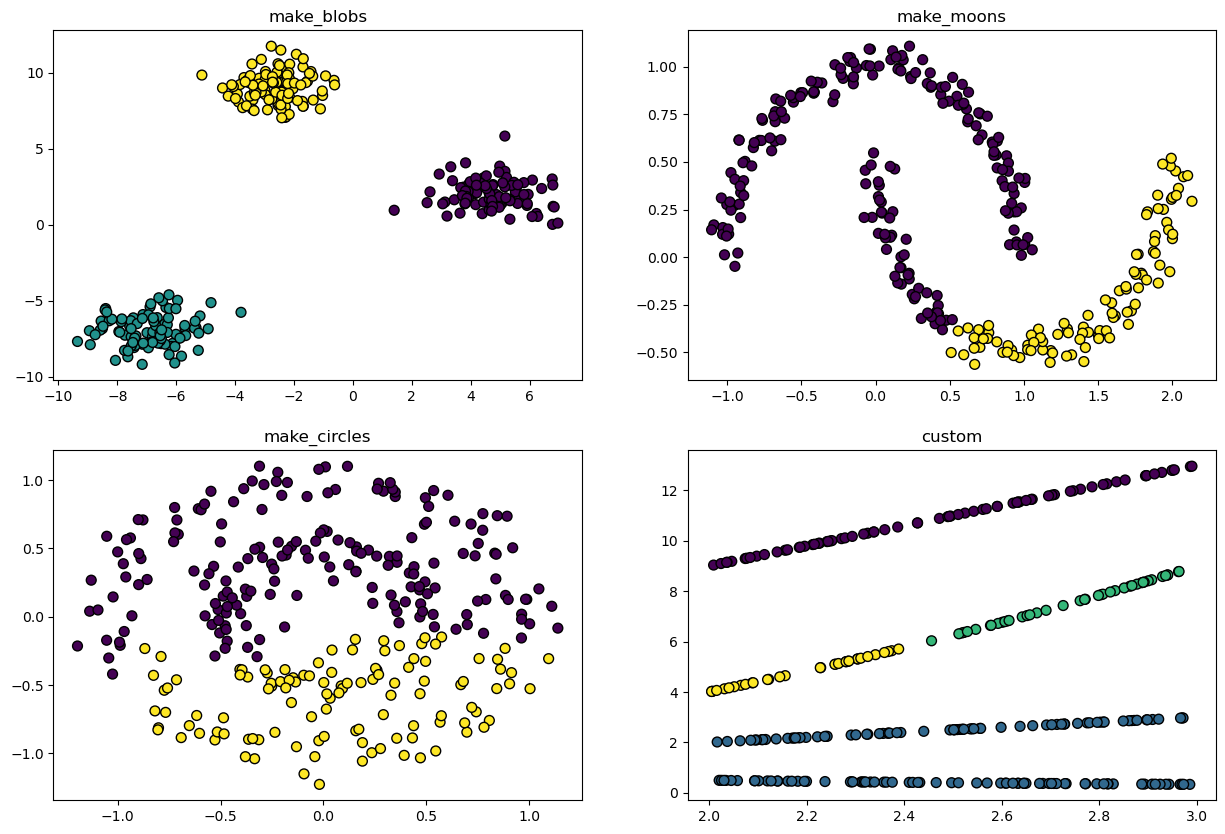

In [266]:
make_blobs_aggclu_3 = AgglomerativeClustering(n_clusters=3, linkage='average', metric='cityblock')
make_moons_aggclu_3 = AgglomerativeClustering(n_clusters=2, linkage='average', metric='cityblock')
make_circles_aggclu_3 = AgglomerativeClustering(n_clusters=2, linkage='average', metric='cityblock')
custom_aggclu_3 = AgglomerativeClustering(n_clusters=4, linkage='average', metric='cityblock')

result_13 = [(X1, make_blobs_aggclu_3.fit_predict(X1), "make_blobs"), 
            (X2, make_moons_aggclu_3.fit_predict(X2), "make_moons"), 
            (X3, make_circles_aggclu_3.fit_predict(X3), "make_circles"), 
            (X4, custom_aggclu_3.fit_predict(X4), "custom")]

plt.figure(figsize=(15, 10))
for i, (X, y, title) in enumerate(result_13, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
    plt.title(title)

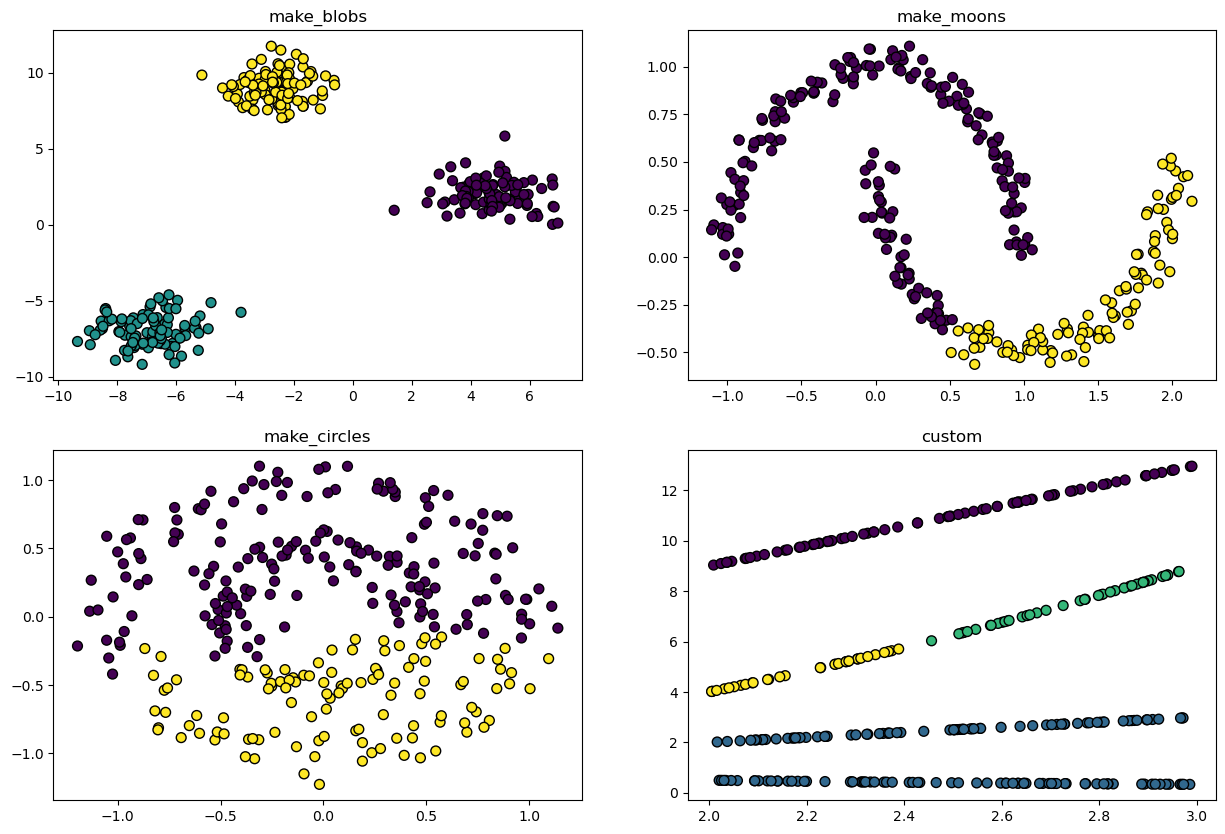

In [267]:
make_blobs_aggclu_4 = AgglomerativeClustering(n_clusters=3, linkage='average', metric='manhattan')
make_moons_aggclu_4 = AgglomerativeClustering(n_clusters=2, linkage='average', metric='manhattan')
make_circles_aggclu_4 = AgglomerativeClustering(n_clusters=2, linkage='average', metric='manhattan')
custom_aggclu_4 = AgglomerativeClustering(n_clusters=4, linkage='average', metric='manhattan')

result_14 = [(X1, make_blobs_aggclu_4.fit_predict(X1), "make_blobs"), 
            (X2, make_moons_aggclu_4.fit_predict(X2), "make_moons"), 
            (X3, make_circles_aggclu_4.fit_predict(X3), "make_circles"), 
            (X4, custom_aggclu_4.fit_predict(X4), "custom")]

plt.figure(figsize=(15, 10))
for i, (X, y, title) in enumerate(result_14, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
    plt.title(title)

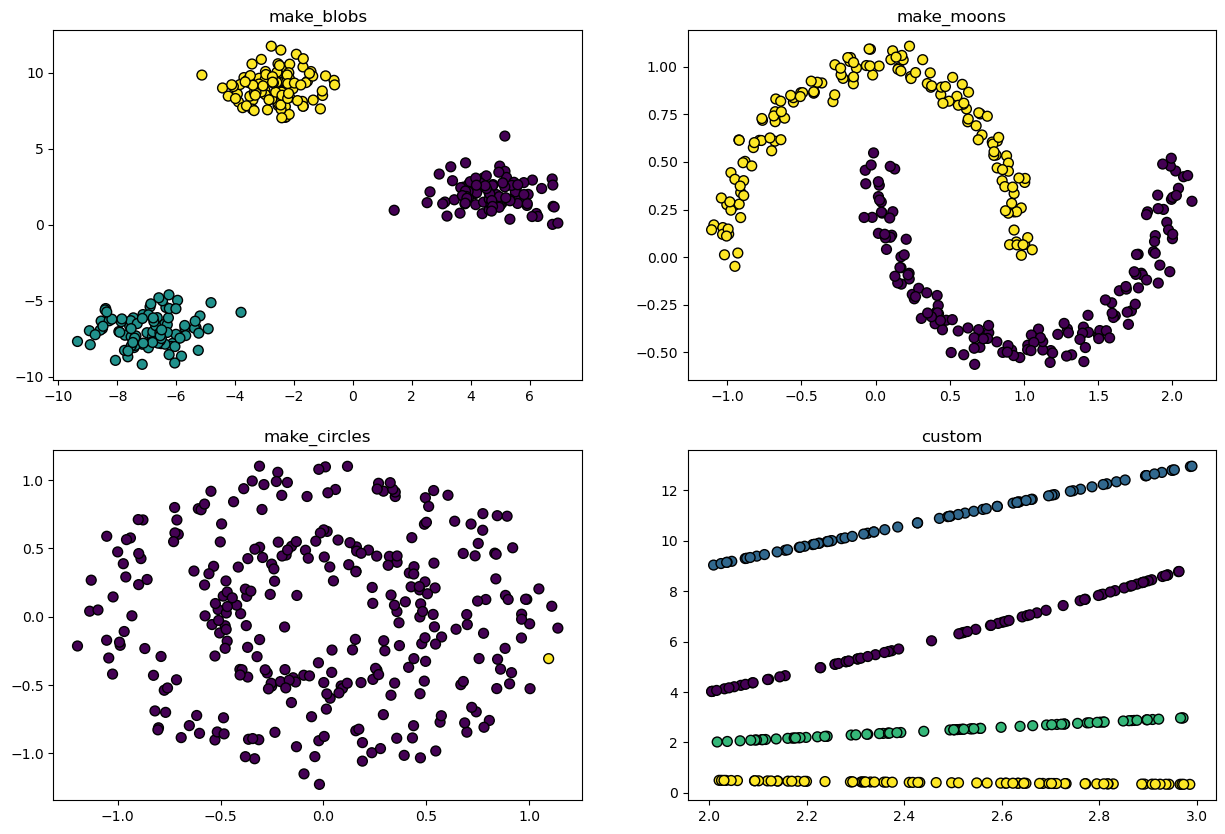

In [268]:
make_blobs_aggclu_5 = AgglomerativeClustering(n_clusters=3, linkage='single')
make_moons_aggclu_5 = AgglomerativeClustering(n_clusters=2, linkage='single')
make_circles_aggclu_5 = AgglomerativeClustering(n_clusters=2, linkage='single')
custom_aggclu_5 = AgglomerativeClustering(n_clusters=4, linkage='single')

result_15 = [(X1, make_blobs_aggclu_5.fit_predict(X1), "make_blobs"), 
            (X2, make_moons_aggclu_5.fit_predict(X2), "make_moons"), 
            (X3, make_circles_aggclu_5.fit_predict(X3), "make_circles"), 
            (X4, custom_aggclu_5.fit_predict(X4), "custom")]

plt.figure(figsize=(15, 10))
for i, (X, y, title) in enumerate(result_15, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
    plt.title(title)

## Набор с многомерными данными

In [269]:
wine = pd.read_csv('winequality-red.csv')
X = wine.drop("quality", axis=1)
y = wine.quality
for i in range(len(y)):
  y[i] = y[i] - 3
y.nunique()

/var/folders/0d/0zl92nhd0bs8sh_jwvbd0l240000gn/T/ipykernel_75577/450603353.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = y[i] - 3


6

### Подбор количества кластеров с помощью метода локтя

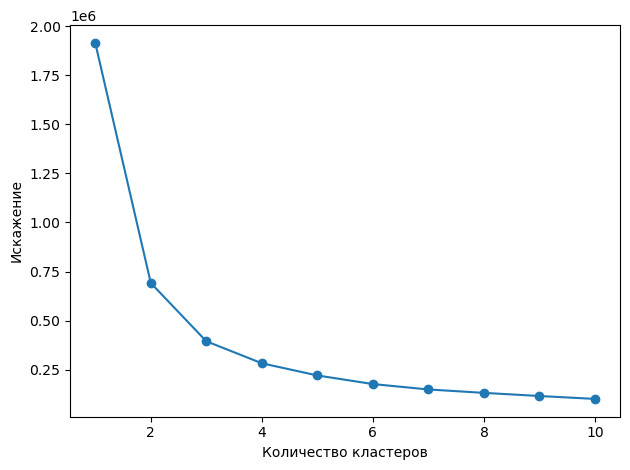

In [270]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, 
                init = 'k-means++',
                n_init = 10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker = 'o')
plt.xlabel('Количество кластеров')
plt.ylabel('Искажение')
plt.tight_layout()
plt.show()

### Кластеризация c 3 кластерами

/Users/tainazitina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(array([ 33.,  42.,  62.,  94.,  98., 119., 170., 278., 219., 484.]),
 array([-0.08351878,  0.00133596,  0.08619069,  0.17104543,  0.25590017,
         0.34075491,  0.42560965,  0.51046439,  0.59531913,  0.68017386,
         0.7650286 ]),
 <BarContainer object of 10 artists>)

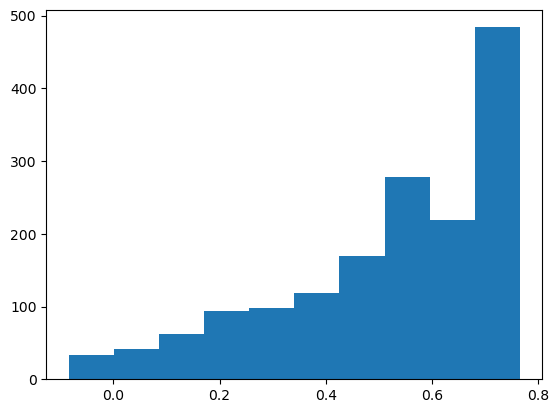

In [271]:
km = KMeans(n_clusters = 3, init = 'k-means++')
y_km = km.fit_predict(X)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_values = silhouette_samples(X, y_km, metric='euclidean')
plt.hist(silhouette_values)

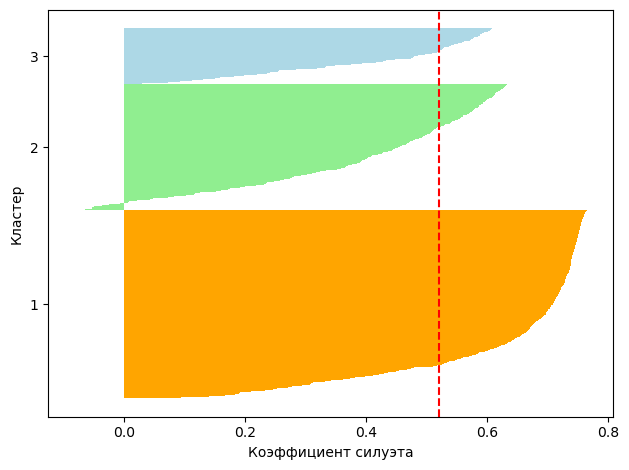

In [272]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []

# выводим оценки сначала для для одного кластера, затем для другого и т.д.
for c in cluster_labels:
    c_silhouette_values = silhouette_values[y_km == c]
    c_silhouette_values.sort()
    y_ax_upper += len(c_silhouette_values)
    color = ["orange", "lightgreen", "lightblue"][c]  
    plt.barh(range(y_ax_lower, y_ax_upper), 
             c_silhouette_values, 
             height = 1.0, 
             edgecolor='none', color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_values)
# отображаем усредненный уровень silhoutte по всем объектам
silhouette_avg = np.mean(silhouette_values)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Кластер')
plt.xlabel('Коэффициент силуэта')
plt.tight_layout()
plt.show()

In [273]:
rand_score = adjusted_rand_score(y, y_km)

print(f'Adjusted Rand Score: {rand_score:.3f}')

Adjusted Rand Score: 0.002


Метрика Rand используется для оценки сходства между истиным разбиением на кластеры и разбиением полученным в результате работы алгоритма.

Эта метрика принимает значения от -1 до 1, где:

1 означает идеальное сходство между двумя кластеризациями.
0 означает случайное сходство.
-1 означает полное несходство.

В данном случае метрика имеет значение 0,002 что означает случайное сходство.

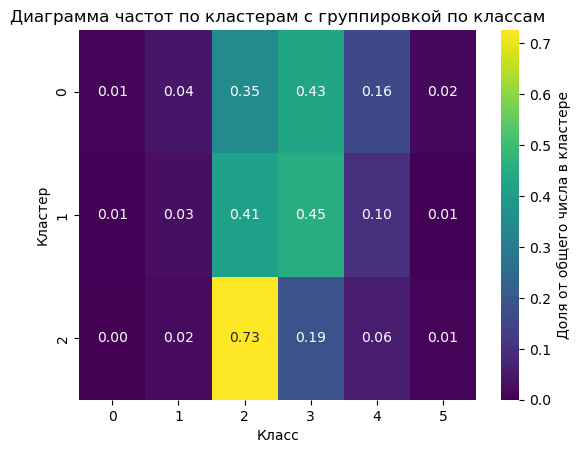

In [274]:
df = pd.DataFrame({'Cluster': y_km, 'Class': y})

# Диаграмма частот по кластерам с группировкой по классам
cross_tab = pd.crosstab(df['Cluster'], df['Class'])
cross_tab_norm = cross_tab.div(cross_tab.sum(axis=1), axis=0) 
sns.heatmap(cross_tab_norm, annot=True, cmap='viridis', fmt='.2f', cbar_kws={'label': 'Доля от общего числа в кластере'})
plt.title('Диаграмма частот по кластерам с группировкой по классам')
plt.xlabel('Класс')
plt.ylabel('Кластер')
plt.show()

### Кластеризация c 6 кластерами

/Users/tainazitina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(array([ 46.,  88., 139., 160., 224., 262., 320., 358.,   0.,   2.]),
 array([-0.07742018,  0.02329462,  0.12400941,  0.2247242 ,  0.32543899,
         0.42615379,  0.52686858,  0.62758337,  0.72829817,  0.82901296,
         0.92972775]),
 <BarContainer object of 10 artists>)

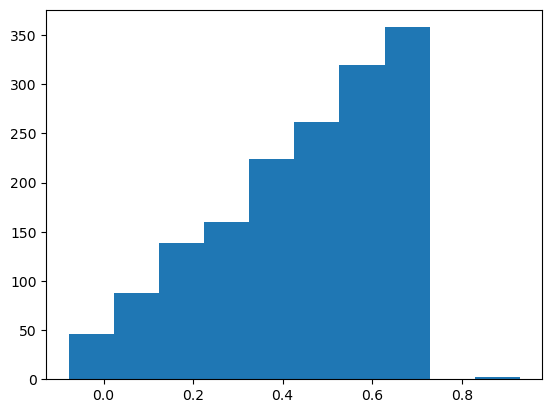

In [275]:
km_2 = KMeans(n_clusters = 6, init = 'k-means++')
y_km_2 = km_2.fit_predict(X)
cluster_labels = np.unique(y_km_2)
n_clusters = cluster_labels.shape[0]
silhouette_values = silhouette_samples(X, y_km_2, metric='euclidean')
plt.hist(silhouette_values)

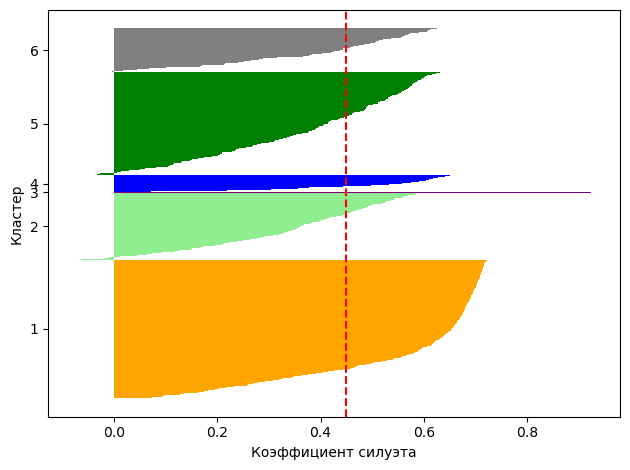

In [276]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []

# выводим оценки сначала для для одного кластера, затем для другого и т.д.
for c in cluster_labels:
    c_silhouette_values = silhouette_values[y_km_2 == c]
    c_silhouette_values.sort()
    y_ax_upper += len(c_silhouette_values)
    color = ["orange", "lightgreen", "purple", "blue", "green", "gray"][c]  
    plt.barh(range(y_ax_lower, y_ax_upper), 
             c_silhouette_values, 
             height = 1.0, 
             edgecolor='none', color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_values)
# отображаем усредненный уровень silhoutte по всем объектам
silhouette_avg = np.mean(silhouette_values)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Кластер')
plt.xlabel('Коэффициент силуэта')
plt.tight_layout()
plt.show()

In [277]:
rand_score = adjusted_rand_score(y, y_km_2)

print(f'Adjusted Rand Score: {rand_score:.3f}')

Adjusted Rand Score: -0.005


Метрика Rand используется для оценки сходства между истиным разбиением на кластеры и разбиением полученным в результате работы алгоритма.

Эта метрика принимает значения от -1 до 1, где:

1 означает идеальное сходство между двумя кластеризациями.
0 означает случайное сходство.
-1 означает полное несходство.

В данном случае метрика имеет значение -0,005 что означает случайное сходство.

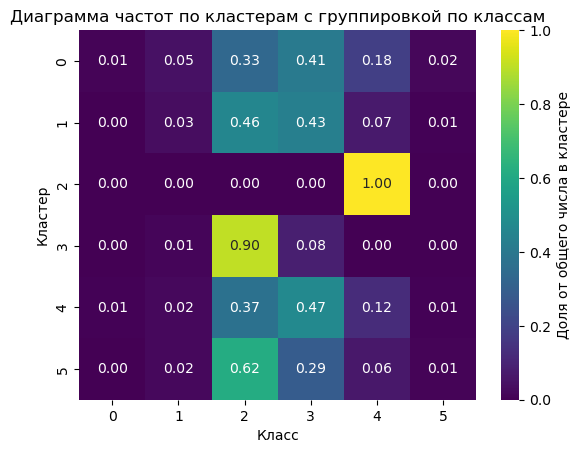

In [278]:
df = pd.DataFrame({'Cluster': y_km_2, 'Class': y})

# Диаграмма частот по кластерам с группировкой по классам
cross_tab = pd.crosstab(df['Cluster'], df['Class'])
cross_tab_norm = cross_tab.div(cross_tab.sum(axis=1), axis=0) 
sns.heatmap(cross_tab_norm, annot=True, cmap='viridis', fmt='.2f', cbar_kws={'label': 'Доля от общего числа в кластере'})
plt.title('Диаграмма частот по кластерам с группировкой по классам')
plt.xlabel('Класс')
plt.ylabel('Кластер')
plt.show()